# Tutorial 1
Date: 3.03.2022  
Author: Kacper Cybiński

### Technical Imports

In [27]:
import scipy.special as sp
import scipy.constants as cons
import matplotlib.pyplot as plt
import numpy as np

#### Functions playground

In [7]:
# J_n Bessel function
sp.jn(2, 1)

0.1149034849319005

In [8]:
#  Planck constant
cons.h

6.62607015e-34

In [9]:
# Command for listing avaliable commands
dir(cons)

['Avogadro',
 'Boltzmann',
 'Btu',
 'Btu_IT',
 'Btu_th',
 'ConstantWarning',
 'G',
 'Julian_year',
 'N_A',
 'Planck',
 'R',
 'Rydberg',
 'Stefan_Boltzmann',
 'Wien',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_codata',
 '_constants',
 '_obsolete_constants',
 'acre',
 'alpha',
 'angstrom',
 'arcmin',
 'arcminute',
 'arcsec',
 'arcsecond',
 'astronomical_unit',
 'atm',
 'atmosphere',
 'atomic_mass',
 'atto',
 'au',
 'bar',
 'barrel',
 'bbl',
 'blob',
 'c',
 'calorie',
 'calorie_IT',
 'calorie_th',
 'carat',
 'centi',
 'codata',
 'constants',
 'convert_temperature',
 'day',
 'deci',
 'degree',
 'degree_Fahrenheit',
 'deka',
 'dyn',
 'dyne',
 'e',
 'eV',
 'electron_mass',
 'electron_volt',
 'elementary_charge',
 'epsilon_0',
 'erg',
 'exa',
 'exbi',
 'femto',
 'fermi',
 'find',
 'fine_structure',
 'fluid_ounce',
 'fluid_ounce_US',
 'fluid_ounce_imp',
 'foot',
 'g',
 'gallon',
 'gallon_US',
 'g

In [10]:
dir(sp)

['SpecialFunctionError',
 'SpecialFunctionWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_add_newdocs',
 '_basic',
 '_comb',
 '_ellip_harm',
 '_ellip_harm_2',
 '_lambertw',
 '_logsumexp',
 '_orthogonal',
 '_sf_error',
 '_specfun',
 '_spfun_stats',
 '_spherical_bessel',
 '_ufuncs',
 '_ufuncs_cxx',
 'add_newdocs',
 'agm',
 'ai_zeros',
 'airy',
 'airye',
 'assoc_laguerre',
 'basic',
 'bdtr',
 'bdtrc',
 'bdtri',
 'bdtrik',
 'bdtrin',
 'bei',
 'bei_zeros',
 'beip',
 'beip_zeros',
 'ber',
 'ber_zeros',
 'bernoulli',
 'berp',
 'berp_zeros',
 'besselpoly',
 'beta',
 'betainc',
 'betaincinv',
 'betaln',
 'bi_zeros',
 'binom',
 'boxcox',
 'boxcox1p',
 'btdtr',
 'btdtri',
 'btdtria',
 'btdtrib',
 'c_roots',
 'cbrt',
 'cg_roots',
 'chdtr',
 'chdtrc',
 'chdtri',
 'chdtriv',
 'chebyc',
 'chebys',
 'chebyt',
 'chebyu',
 'chndtr',
 'chndtridf',
 'chndtrinc',
 'chndtrix',
 'clpmn',
 'comb',
 'cosdg',

### Task 1

In [100]:
# Spherical Bessel Functions up to order 3
f = lambda m: sp.riccati_jn(3, m)[0]
#  Fresnel Integral
g = lambda m: sp.fresnel(m)
x = np.linspace(0, 100, 10000)
y = [(lambda d: f(d))(d) for d in x]
y_1 = [(lambda d: g(d))(d) for d in x]

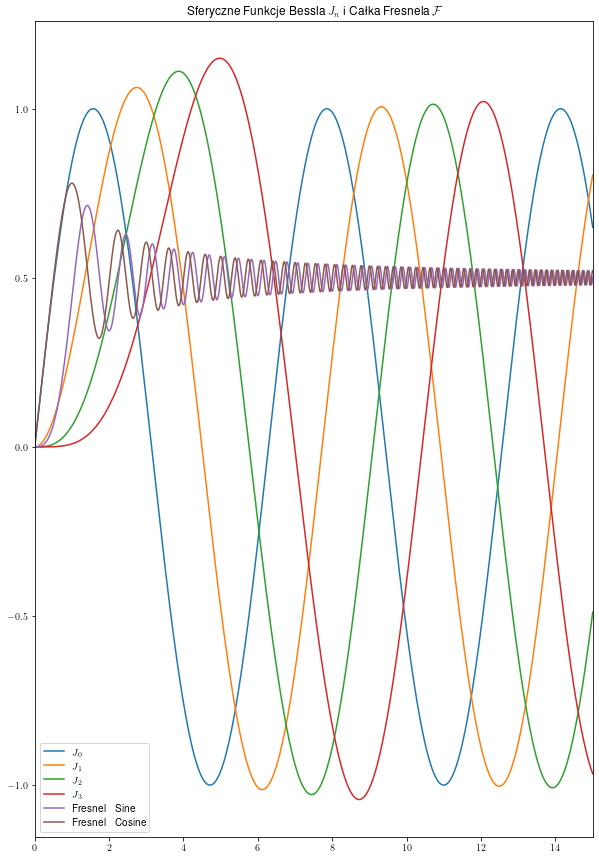

In [101]:
fig, ax = plt.subplots(figsize=(10,15))
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})
lineObjects = plt.plot(x, y, label=["$J_0$", "$J_1$", "$J_2$", "$J_3$"])
plt.xlim(x.min(), x.max()*0.15)
lineObjects_2 = plt.plot(x, y_1, label=["Fresnel\quad Sine","Fresnel\quad Cosine"])
# plt.legend(lineObjects, ["$J_0$", "$J_1$", "$J_2$", "$J_3$"])
plt.legend()
plt.title("Sferyczne Funkcje Bessla $J_n$ i Całka Fresnela $\mathcal{F}$")
plt.savefig("bessel_jn.pdf", format="pdf")
plt.show()

### Task 2

In [123]:
n=4000
A = np.zeros((n,n)) 
x = np.zeros(n)
for i in range(n):
    x[i] = i/2.0
    for j in range(n):
        A[i,j]=i+j +(i+1)%(j+1)
        
b = np.dot(A, x)
y = np.linalg.solve(A,b)
res = x - y
norm = np.linalg.norm(res)

print("The norm of resulting vector 'res' is approximately {:.3e}".format(norm))

The norm of resulting vector 'res' is approximately 5.729e-05


### Task 3

**Task 3B**

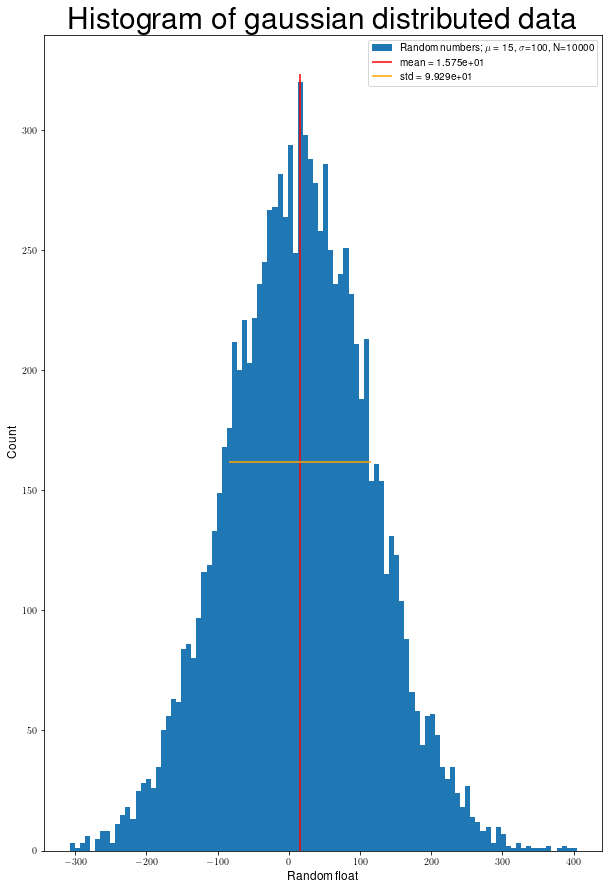

In [186]:
mean = 15
sigma = 100
N = 10000

x = np.asarray([(lambda n : np.random.normal(loc=mean, scale=sigma))(n) for n in range(N)])
mu = np.mean(x)
sig = np.std(x)

fig, ax = plt.subplots(figsize=(10,15))
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})
plt.hist(x, bins=int(sigma), label="Random numbers; $\mu$ = {}, $\sigma$={}, N={}".format(mean, sigma, N))
plt.vlines(mu,0, 0.8*x.max(), label="mean = {:.3e}".format(mu), colors="red")
plt.hlines(0.4*x.max(), mu-sig, mu+sig, label="std = {:.3e}".format(sig), colors="orange")
plt.legend()
plt.title("Histogram of gaussian distributed data", fontsize=30)
plt.xlabel('Random float', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Task 3B**

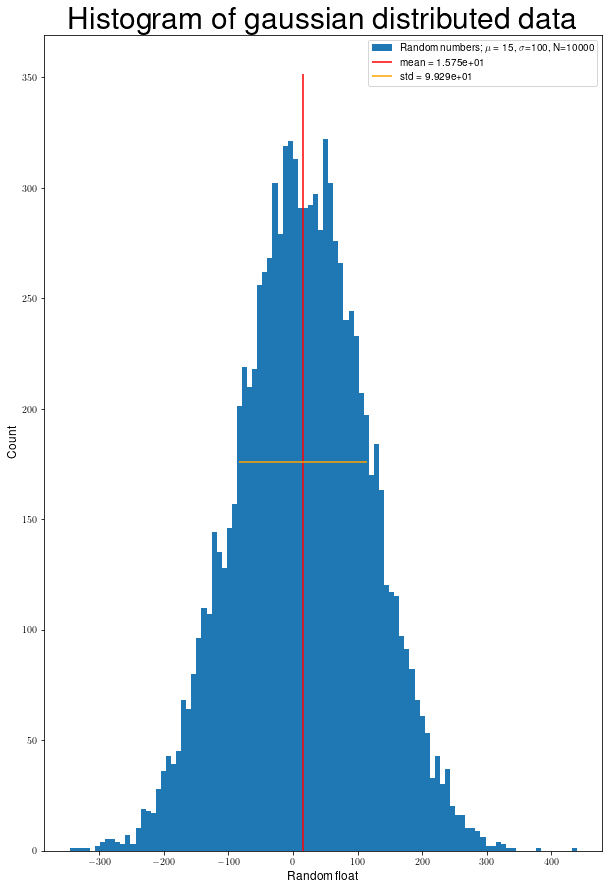

In [203]:
xsum = np.zeros(N)
P = 10

for i in range(P):
    z = np.array([(lambda n : np.random.uniform(-1,1))(n) for n in range(N)])
    xsum = np.add(xsum, z, dtype=float)

xnew = mean + sigma * xsum * np.sqrt(3./P)
    
fig, ax = plt.subplots(figsize=(10,15))
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})
plt.hist(xnew, bins=int(sigma), label="Random numbers; $\mu$ = {}, $\sigma$={}, N={}".format(mean, sigma, N))
plt.vlines(mu,0, 0.8*xnew.max(), label="mean = {:.3e}".format(mu), colors="red")
plt.hlines(0.4*xnew.max(), mu-sig, mu+sig, label="std = {:.3e}".format(sig), colors="orange")
plt.legend()
plt.title("Histogram of gaussian distributed data", fontsize=30)
plt.xlabel('Random float', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Outcome: By summing up uniform distributions and rescaling it according to equation:  
$xnew = \mu + \sigma \cdot xsum \cdot \sqrt{\frac{3}{P}}$  
we returned to normal distribution.

### Code reformatting

In [204]:
!pre-commit run --all --show-diff-on-failure

black................................................(no files to check)Skipped
flake8...............................................(no files to check)Skipped
Check JSON...........................................(no files to check)Skipped
Check Yaml...........................................(no files to check)Skipped
Check for merge conflicts................................................Passed
Fix End of Files.........................................................Passed
Trim Trailing Whitespace.................................................Passed
Debug Statements (Python)............................(no files to check)Skipped
Mixed line ending........................................................Passed
setup-cfg-fmt........................................(no files to check)Skipped
pyupgrade............................................(no files to check)Skipped
rst ``code`` is two backticks........................(no files to check)Skipped
isort...................................